# Trabalho  de Física Computacional
Alunos: Wagner Martins de Lima Filho e Tiago Daniel Rodrigues da Silva

In [441]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo SIR

### O modelo SIR é descrito pelo sistema de EDO's abaixo:
$$
\begin{equation}
\frac{dS}{dt}=\beta SI \quad
\end{equation}
\\
\begin{equation}
\frac{dI}{dt}=\beta SI - \gamma I \quad
\end{equation}
\\
\begin{equation}
\frac{dR}{dt}=\gamma I \quad
\end{equation}
\\
$$


#### Definindo o método Runge-Kutta 4

In [442]:
def metRK4(f, r0, ti, tf, n):
    r=r0
    h = (ti+tf)/n
    xpoints = []
    ypoints = []
    zpoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2, t+h/2)
        k3 = h*f(r+k2/2, t+h/2)
        k4 = h*f(r+k3, t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
    return np.array(xpoints), np.array(ypoints), np.array(zpoints), np.array(tpoints)

#### Visualização do modelo

In [443]:
R0 = 5
gamma = .2
beta = R0*gamma

def f(r,t):
  s, i, r = r
  fs = -beta*s*i
  fi = beta*s*i - gamma*i
  fr = gamma*i
  return np.array([fs, fi, fr])

N = 10**4
infectados = 2
sucetiveis = N-infectados
recuperados = 0

scale_factor = N

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor

s, i, r, t = metRK4(f, [sucetiveis, infectados, recuperados], 0, 120, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor

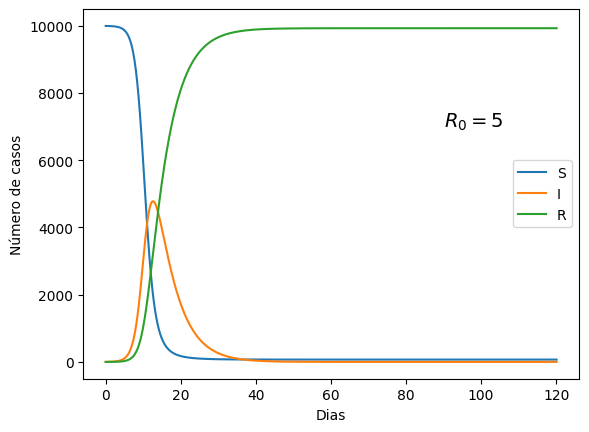

In [444]:
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.legend(['S', 'I', 'R'])
plt.text(90, 7*10**3, fr'$R_0={R0}$', fontsize=14)
plt.ylabel('Número de casos')
plt.xlabel('Dias')
plt.show()

### Simulando infectados com COVID-19
Projeção do total de casos acumulados (Recuperados + Infectados)

Testamos o modelo com $R_0=1.44$ de acordo com a pesquisa feita em maio de 2020 pelo CENPE, disponível em: [Panorama da Pandemia de Covid-19 no Estado do Rio de Janeiro](https://www.mprj.mp.br/documents/20184/540394/panorama_da_pandemia_de_covid19_no_estado_do_rio_de_janeiro_e_a_necessidade_do_isolamento_15052020_v2.pdf)

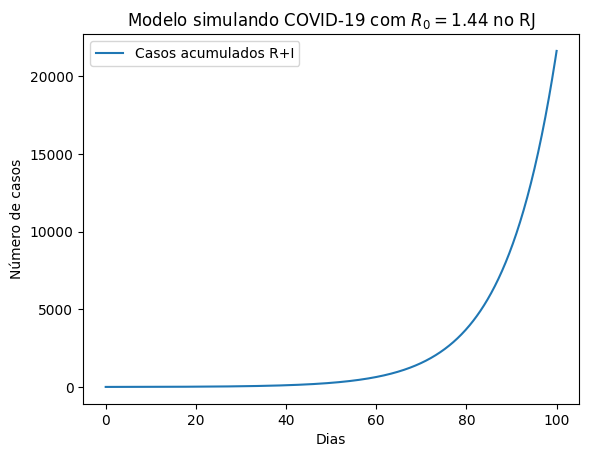

In [445]:
R0 = 1.44
gamma = .2
beta = R0*gamma

N = 16*10**6 # Estimativa da população do estado do Rio de Janeiro
infectados = 1
sucetiveis = N-infectados
recuperados = 0

scale_factor = N

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor

s, i, r, t = metRK4(f, [sucetiveis, infectados, recuperados], 0, 100, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor

plt.plot(t,i+r)
plt.legend(['Casos acumulados R+I'])
plt.title(fr'Modelo simulando COVID-19 com $R_0={R0}$ no RJ')
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()

### Efeito da vacinação diária

#### O modelo SIR para vacinação pode ser descrito pelo sistema de EDO's abaixo:
$$
\begin{equation}
\frac{dS}{dt}=\beta SI - \nu S \quad
\end{equation}
\\
\begin{equation}
\frac{dV}{dt}=\nu S \quad
\end{equation}
\\
\begin{equation}
\frac{dI}{dt}=\beta SI - \gamma I \quad
\end{equation}
\\
\begin{equation}
\frac{dR}{dt}=\gamma I \quad
\end{equation}
\\
$$


Ampliando o sistema para 4 funções

In [446]:
def metRK4(f, r0, ti, tf, n):
    r=r0
    h = (ti+tf)/n
    xpoints = []
    ypoints = []
    zpoints = []
    apoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        apoints.append(r[3])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2, t+h/2)
        k3 = h*f(r+k2/2, t+h/2)
        k4 = h*f(r+k3, t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
    return np.array(xpoints), np.array(ypoints), np.array(zpoints), np.array(apoints), np.array(tpoints)

Simulando o modelo para $\nu = 0.01$ e $R_0 = 2.5$

In [447]:
R0 = 2.5
gamma = .2
beta = R0*gamma
ni = 0.01

N = 10**4
infectados = 2
sucetiveis = N-infectados
recuperados = 0
vacinados = 0

scale_factor = N

def f_vacinados(vec,t):
  s, i, r, v = vec
  fs = -beta*s*i - ni*s
  fi = beta*s*i - gamma*i
  fr = gamma*i
  fv = ni*s
  return np.array([fs, fi, fr, fv])

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor
vacinados /= scale_factor

s, i, r, v, t = metRK4(f_vacinados, [sucetiveis, infectados, recuperados, vacinados], 0, 120, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor
v*=scale_factor

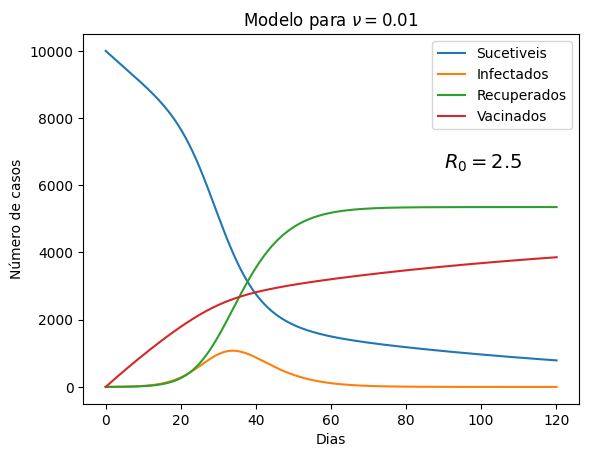

In [448]:
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.plot(t,v)
plt.ticklabel_format(style='sci')
plt.text(90, 6.5*10**3, fr'$R_0={R0}$', fontsize=14)
plt.legend(['Sucetiveis', 'Infectados', 'Recuperados', 'Vacinados'])
plt.title(r'Modelo para $\nu=0.01$')
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()

### Efeito da vacinação inicial

Ainda tratando das equações (1), (2), (3), (4) consideraremos que a taxa de vacinação se mantém constante $\nu=0$ a fim de visualizar o efeito da vacinação na prevenção de contaminação de forma isolada.

Portanto consideraremos $\rho = 0.3$

In [449]:
R0 = 2.5
gamma = .2
beta = R0*gamma
ro = 0.3
ni = 0.0

N = 10**4
infectados = 2
sucetiveis = (1-ro)*N-infectados
recuperados = 0
vacinados = ro*N

scale_factor = N

def f_vacinados(vec,t):
  s, i, r, v = vec
  fs = -beta*s*i - ni*s
  fi = beta*s*i - gamma*i
  fr = gamma*i
  fv = ni*s
  return np.array([fs, fi, fr, fv])

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor
vacinados /= scale_factor

s, i, r, v, t = metRK4(f_vacinados, [sucetiveis, infectados, recuperados, vacinados], 0, 120, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor
v*=scale_factor

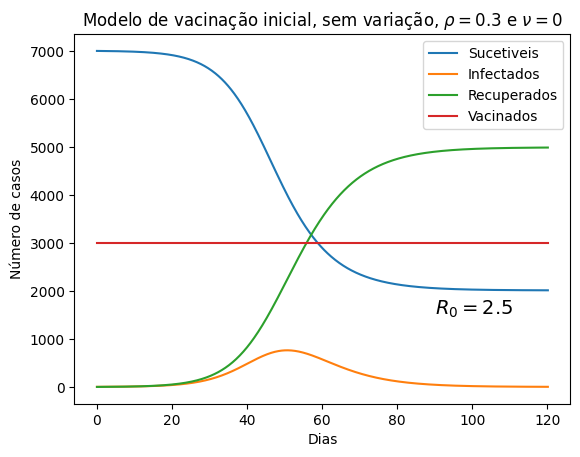

In [450]:
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.plot(t,v)
plt.ticklabel_format(style='sci')
plt.text(90, 15*10**2, fr'$R_0={R0}$', fontsize=14)
plt.legend(['Sucetiveis', 'Infectados', 'Recuperados', 'Vacinados'])
plt.title(r'Modelo de vacinação inicial, sem variação, $\rho=0.3$ e $\nu=0$')
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()

#### As implicações de diferentes valores de $\rho$

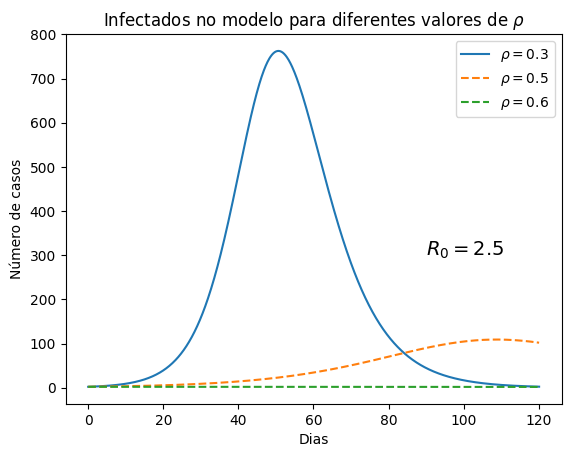

In [451]:
R0 = 2.5
gamma = .2
beta = R0*gamma
ro1 = 0.3
ro2 = 0.5
ro3 = 0.6
ni = 0.0

N = 10**4
infectados = 2
sucetiveis1 = (1-ro1)*N-infectados
sucetiveis2 = (1-ro2)*N-infectados
sucetiveis3 = (1-ro3)*N-infectados
recuperados = 0
vacinados1 = ro*N
vacinados2 = ro*N
vacinados3 = ro*N

scale_factor = N

infectados /= scale_factor
sucetiveis1 /= scale_factor
sucetiveis2 /= scale_factor
sucetiveis3 /= scale_factor
recuperados /= scale_factor
vacinados /= scale_factor

_, i1, _, _, t = metRK4(f_vacinados, [sucetiveis1, infectados, recuperados, vacinados], 0, 120, 10**3)
_, i2, _, _, t = metRK4(f_vacinados, [sucetiveis2, infectados, recuperados, vacinados], 0, 120, 10**3)
_, i3, _, _, t = metRK4(f_vacinados, [sucetiveis3, infectados, recuperados, vacinados], 0, 120, 10**3)

s*=scale_factor
i1*=scale_factor
i2*=scale_factor
i3*=scale_factor
r*=scale_factor
v*=scale_factor

plt.plot(t,i1)
plt.plot(t,i2, '--')
plt.plot(t,i3, '--')

plt.ticklabel_format(style='sci')
plt.legend([r'$\rho=0.3$', r'$\rho=0.5$', r'$\rho=0.6$'])
plt.title(r'Infectados no modelo para diferentes valores de $\rho$')
plt.text(90, 3*10**2, fr'$R_0={R0}$', fontsize=14)
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()

### Efeito da vacinação diária e inicial

Para esta simulação imaginaremos que há uma vacinação inicial e que será iniciada uma nova campanha em conjunto.

Para isto, consideraremos: $\rho=0.03$ e $\nu=0.01$

In [452]:
R0 = 2.5
gamma = .2
beta = R0*gamma
ro = 0.3
ni = 0.01

N = 10**4
infectados = 2
sucetiveis = (1-ro)*N-infectados
recuperados = 0
vacinados = ro*N

scale_factor = N

def f_vacinados(vec,t):
  s, i, r, v = vec
  fs = -beta*s*i - ni*s
  fi = beta*s*i - gamma*i
  fr = gamma*i
  fv = ni*s
  return np.array([fs, fi, fr, fv])

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor
vacinados /= scale_factor

s, i, r, v, t = metRK4(f_vacinados, [sucetiveis, infectados, recuperados, vacinados], 0, 120, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor
v*=scale_factor

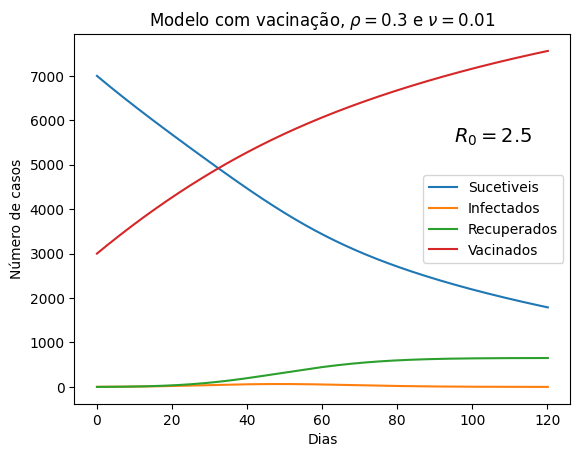

In [453]:
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.plot(t,v)
plt.ticklabel_format(style='sci')
plt.text(95, 5.5*10**3, fr'$R_0={R0}$', fontsize=14)
plt.legend(['Sucetiveis', 'Infectados', 'Recuperados', 'Vacinados'])
plt.title(r'Modelo com vacinação, $\rho=0.3$ e $\nu=0.01$')
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()

### Vacinação inicial mínima para não gerar uma epidemia da Covid-19 no Brasil
Imaginando uma situação de pandemia com $R_0=2.5$, o valor mínimo de vacinação é dado por $\rho_{min}=1-\frac{1}{R_0} \therefore \rho = 0.6$

In [454]:
R0 = 2.5
gamma = .2
beta = R0*gamma
ro = 0.6
ni = 0.0

N = 10**4
infectados = 2
sucetiveis = (1-ro)*N-infectados
recuperados = 0
vacinados = ro*N

scale_factor = N

def f_vacinados(vec,t):
  s, i, r, v = vec
  fs = -beta*s*i - ni*s
  fi = beta*s*i - gamma*i
  fr = gamma*i
  fv = ni*s
  return np.array([fs, fi, fr, fv])

infectados /= scale_factor
sucetiveis /= scale_factor
recuperados /= scale_factor
vacinados /= scale_factor

s, i, r, v, t = metRK4(f_vacinados, [sucetiveis, infectados, recuperados, vacinados], 0, 120, 10**3)
s*=scale_factor
i*=scale_factor
r*=scale_factor
v*=scale_factor

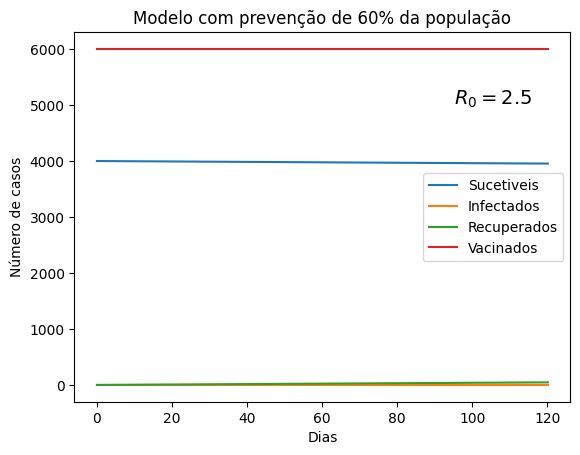

In [455]:
plt.plot(t,s)
plt.plot(t,i)
plt.plot(t,r)
plt.plot(t,v)
plt.ticklabel_format(style='sci')
plt.text(95, 5*10**3, fr'$R_0={R0}$', fontsize=14)
plt.legend(['Sucetiveis', 'Infectados', 'Recuperados', 'Vacinados'])
plt.title(r'Modelo com prevenção de 60% da população')
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.show()